# Bathymetry

This is a simple example to show how to plot the model bathymetry. It uses cartopy, and the recently developed 0.1° topography.

In [5]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import IPython.display

In [6]:
file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'
data = nc.Dataset(file)
depth = data.variables['depth'][:,:]

In [7]:
lons = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','geolon_t',n=1).isel(time=0)
lats = cc.get_nc_variable('KDS75_newbathy_JRA','ocean.nc','geolat_t',n=1)[0,:,:]
IPython.display.clear_output()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1539: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


Text(0.5,1,'ACCESS-OM2-01 Bathymetry')

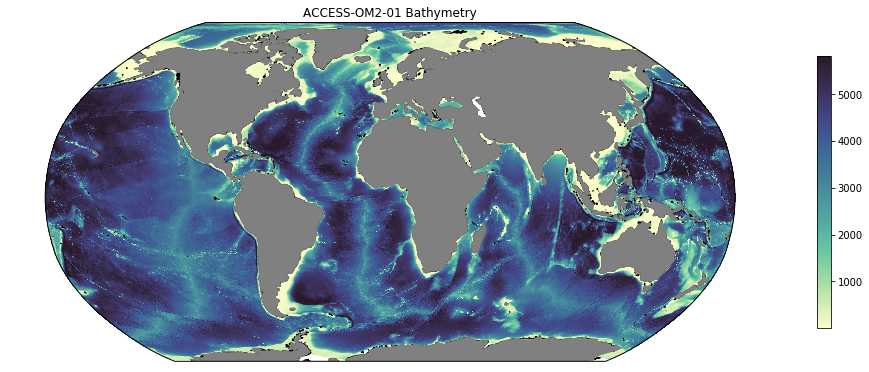

In [9]:
plt.figure(figsize=(17,10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND,color='gray')
plt.pcolormesh(lons, lats, depth, cmap=cm.cm.deep, transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.5)
plt.title('ACCESS-OM2-01 Bathymetry')
#plt.savefig('../../bathymetry.png',dpi=300)